In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore') 

start = time.perf_counter()

In [2]:
df = pd.read_csv('earl694412-infinite-matchhistory.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            564 non-null    object 
 1   Player          564 non-null    object 
 2   MatchId         564 non-null    object 
 3   Map             564 non-null    object 
 4   Category        564 non-null    object 
 5   Playlist        564 non-null    object 
 6   Input           564 non-null    object 
 7   Queue           564 non-null    object 
 8   Csr             564 non-null    int64  
 9   Mmr             1 non-null      float64
 10  Outcome         564 non-null    object 
 11  Accuracy        564 non-null    float64
 12  DamageDone      564 non-null    int64  
 13  DamageTaken     564 non-null    int64  
 14  ShotsFired      564 non-null    int64  
 15  ShotsLanded     564 non-null    int64  
 16  ShotsMissed     564 non-null    int64  
 17  KD              564 non-null    flo

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['LengthMinutes'] = df['LengthSeconds'] / 60
df['DamageRatio'] = df['DamageDone'] / df['DamageTaken']
df['Kills/10Min'] = (df['Kills'] / df['LengthMinutes']) * 10
df['Deaths/10Min'] = (df['Deaths'] / df['LengthMinutes']) * 10
df['Assists/10Min'] = (df['Assists'] / df['LengthMinutes']) * 10
df['Dmg/10Min'] = (df['DamageDone'] / df['LengthMinutes']) * 10
df['DmgT/10Min'] = (df['DamageTaken'] / df['LengthMinutes']) * 10
df['ExcessKills'] = df['Kills'] - df['ExpectedKills']
df['ExcessDeaths'] = df['ExpectedDeaths'] - df['Deaths']
df['LifetimeKD'] = df['Kills'].cumsum() / df['Deaths'].cumsum()
df['LifetimeDmgRatio'] = df['DamageDone'].cumsum() / df['DamageTaken'].cumsum()
df['LifetimeAcc'] = df['ShotsLanded'].cumsum() / df['ShotsFired'].cumsum() * 100

df = df.drop(['Player', 'MatchId', 'Input', 'Queue', 'Mmr'],axis=1)
dfr = df[df['Date']> '2023-01-01']
dfr = dfr[dfr['Playlist'] == 'Ranked Arena']
dfr['Csr'] = dfr['Csr'].replace(0, method='ffill')
dfr = dfr[dfr['Outcome'] != 'Draw']
dfr = dfr[dfr['Outcome'] != 'Left']
dfr['Outcome'] = dfr['Outcome'].map({'Win': 1, 'Loss': 0})
dfr['LifetimeWinRate'] = (dfr['Outcome'].cumsum() / 
                          (dfr['Outcome'].cumsum() + 
                           dfr['Outcome'].eq(0).cumsum())).fillna(0)
dfr = dfr.drop('Playlist', axis=1).reset_index()
dfr.loc[:4, 'Csr'] = 808
dfr.to_csv('df.csv')
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             355 non-null    int64         
 1   Date              355 non-null    datetime64[ns]
 2   Map               355 non-null    object        
 3   Category          355 non-null    object        
 4   Csr               355 non-null    int64         
 5   Outcome           355 non-null    int64         
 6   Accuracy          355 non-null    float64       
 7   DamageDone        355 non-null    int64         
 8   DamageTaken       355 non-null    int64         
 9   ShotsFired        355 non-null    int64         
 10  ShotsLanded       355 non-null    int64         
 11  ShotsMissed       355 non-null    int64         
 12  KD                355 non-null    float64       
 13  KDA               355 non-null    float64       
 14  Kills             355 non-

In [4]:
dfr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,355.0,352.588732,121.839038,140.000000,254.500000,351.000000,457.500000,563.000000
Csr,355.0,951.425352,52.920652,790.000000,931.500000,957.000000,987.000000,1058.000000
Outcome,355.0,0.535211,0.499463,0.000000,0.000000,1.000000,1.000000,1.000000
Accuracy,355.0,51.910338,5.614370,24.390000,48.680000,52.310000,54.825000,80.560000
DamageDone,355.0,5085.307042,1865.736314,347.000000,3771.000000,4736.000000,6333.000000,12673.000000
DamageTaken,355.0,4379.436620,1580.979534,276.000000,3325.500000,4120.000000,5333.000000,9962.000000
ShotsFired,355.0,228.526761,79.591799,16.000000,177.500000,218.000000,286.500000,468.000000
ShotsLanded,355.0,118.529577,42.838167,4.000000,91.000000,111.000000,147.500000,281.000000
ShotsMissed,355.0,109.997183,40.029826,7.000000,83.000000,106.000000,136.000000,261.000000
KD,355.0,1.255577,0.681984,0.000000,0.860000,1.130000,1.440000,6.000000


In [5]:
dfr.Kills.sum()

5121

In [6]:
# dfr.hist(bins=15, figsize=(18, 14))
# plt.tight_layout()
# plt.show()

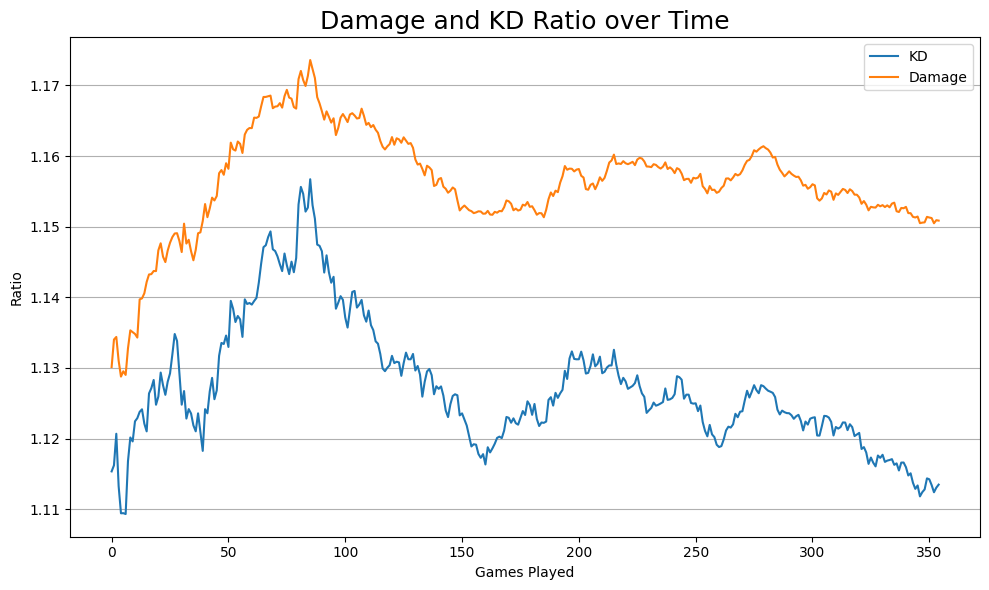

In [7]:
plt.figure(figsize=(10,6))
plt.plot(dfr['LifetimeKD'], label='KD' )
plt.plot(dfr['LifetimeDmgRatio'], label='Damage')
plt.title('Damage and KD Ratio over Time', fontsize=18)
plt.xlabel('Games Played')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('Plots/DamKDRatios.png', dpi=300)
plt.show()

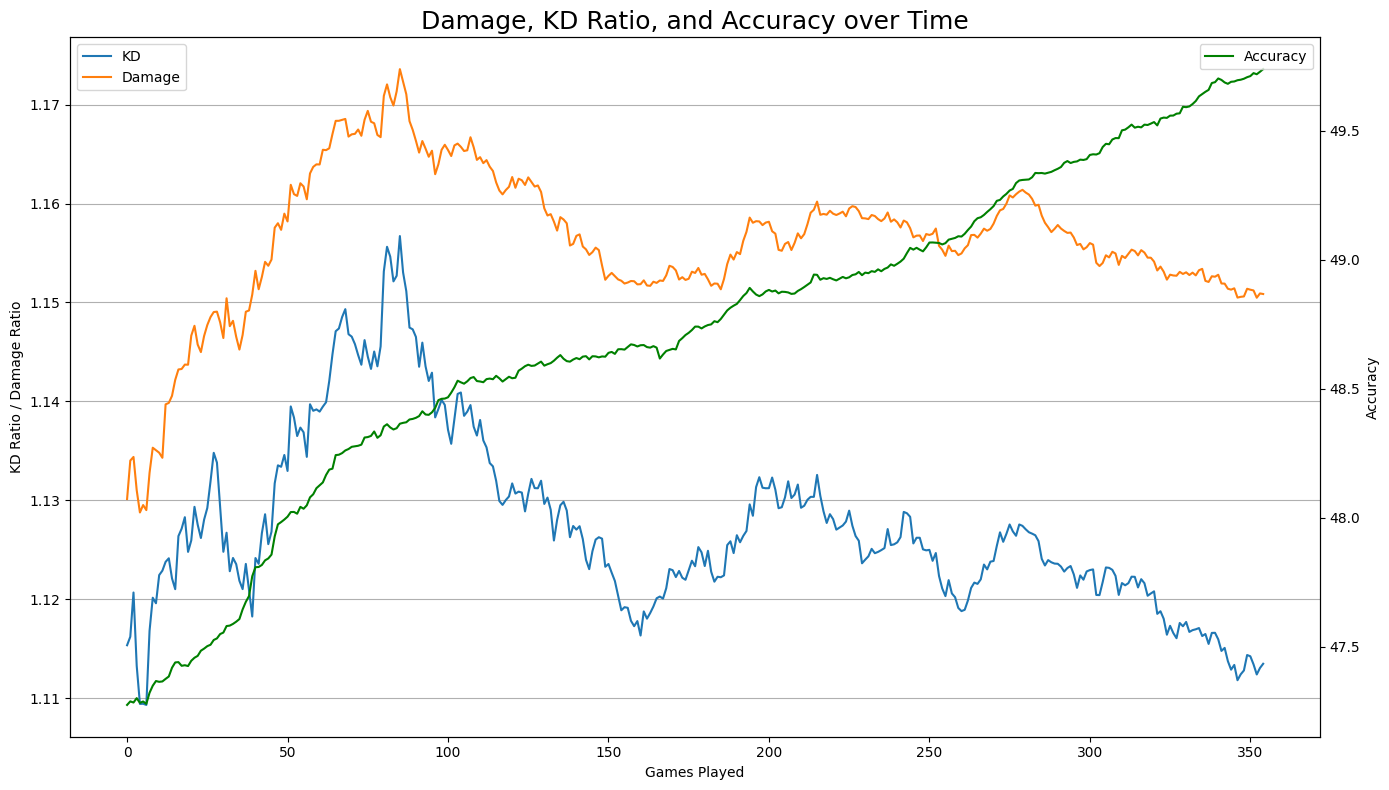

In [8]:
# Smooth the LifetimeWinRate using a 10-game moving average
# dfr['SmoothedAccuracy'] = dfr['Accuracy'].rolling(window=25).mean()

plt.figure(figsize=(14,8))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(dfr['LifetimeKD'], label='KD' )
ax1.plot(dfr['LifetimeDmgRatio'], label='Damage')
ax2.plot(dfr['LifetimeAcc'], color='green', label='Accuracy')
ax1.set_title('Damage, KD Ratio, and Accuracy over Time', fontsize=18)
ax1.set_xlabel('Games Played')
ax1.set_ylabel('KD Ratio / Damage Ratio')
ax2.set_ylabel('Accuracy')
# max_y_value = df['LifetimeAcc'].max()
ax1.yaxis.grid(True)
# ax2.set_yticks(np.arange(47, max_y_value, 0.5))
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
# plt.savefig('Plots/DamKDRatiosAcc.png', dpi=300)
plt.show()

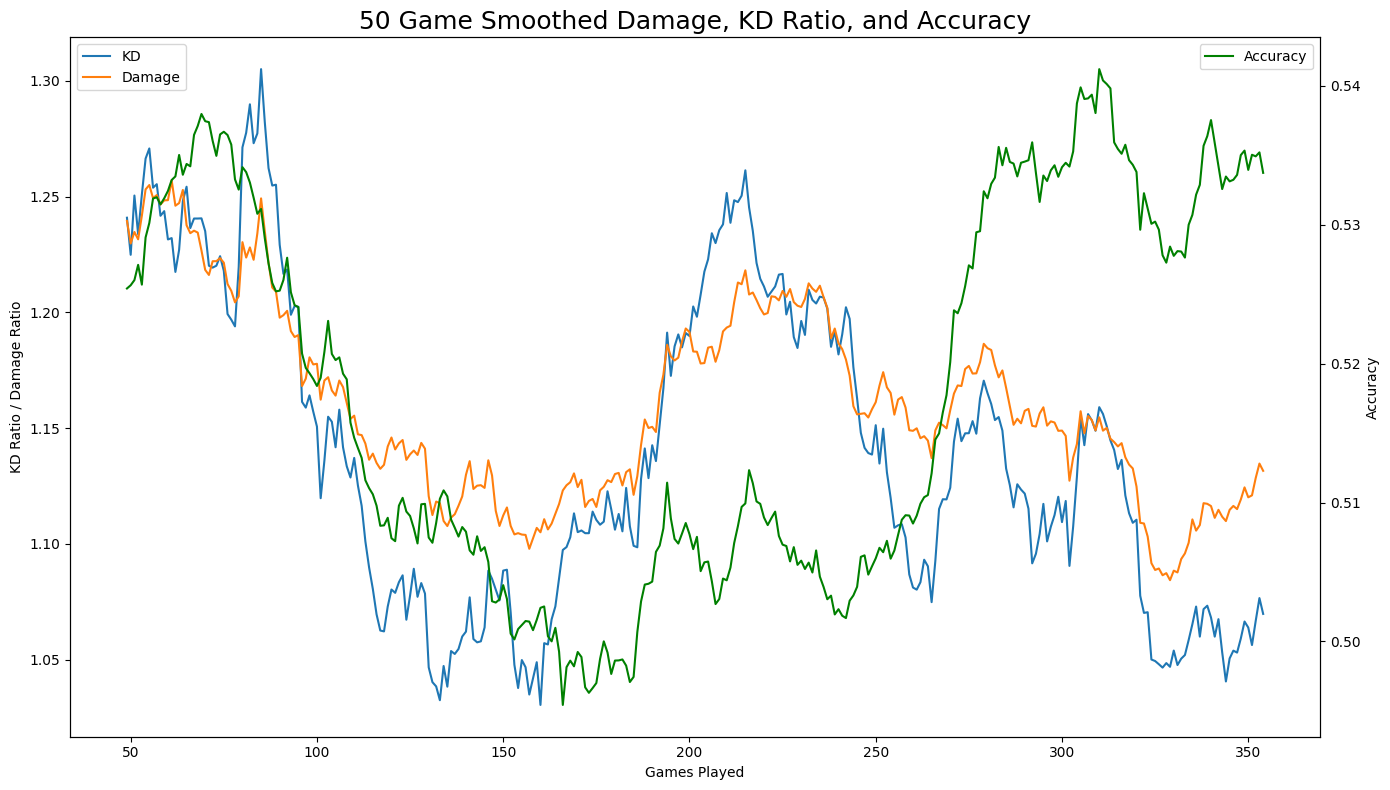

In [9]:
# Smooth the LifetimeWinRate using a 10-game moving average
# Set roll to ** game moving average
roll = 50
dfr['SmoothedAccuracy'] = dfr['ShotsLanded'].rolling(window=roll).sum() / dfr['ShotsFired'].rolling(window=roll).sum()
dfr['SmoothedDmgRatio'] = dfr['DamageDone'].rolling(window=roll).sum() / dfr['DamageTaken'].rolling(window=roll).sum()
dfr['SmoothedKD'] = dfr['Kills'].rolling(window=roll).sum() / dfr['Deaths'].rolling(window=roll).sum()


plt.figure(figsize=(14,8))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(dfr['SmoothedKD'], label='KD' )
ax1.plot(dfr['SmoothedDmgRatio'], label='Damage')
ax2.plot(dfr['SmoothedAccuracy'], color='green', label='Accuracy')
ax1.set_title(f'{roll} Game Smoothed Damage, KD Ratio, and Accuracy', fontsize=18)
ax1.set_xlabel('Games Played')
ax1.set_ylabel('KD Ratio / Damage Ratio')
ax2.set_ylabel('Accuracy')
max_y_value = df['Accuracy'].max()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.savefig('Plots/DamKDRatiosAccSmooth.png', dpi=300)
plt.show()

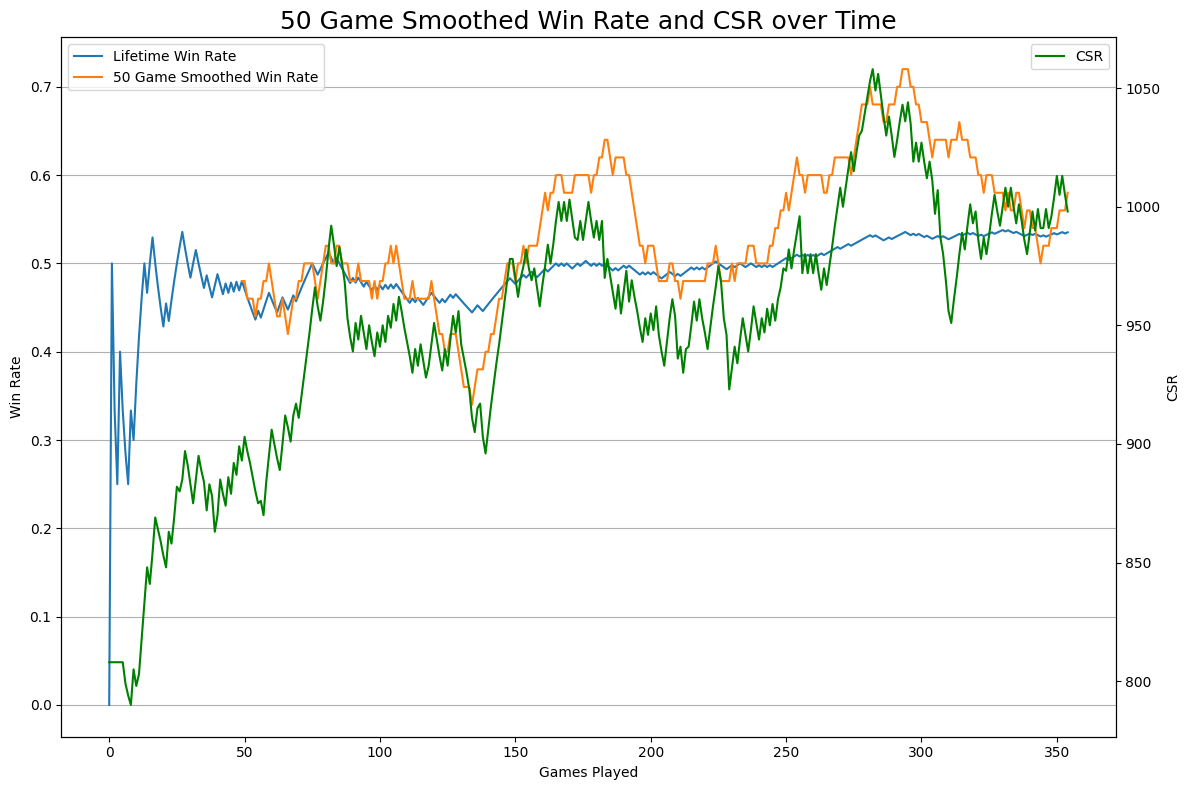

In [10]:
# Smooth the LifetimeWinRate using a 10-game moving average
# dfr['SmoothedWinRate'] = dfr['LifetimeWinRate'].rolling(window=15).mean()
roll = 50
dfr['SmoothedWinRate'] = dfr['Outcome'].rolling(window=roll).sum() / dfr['Outcome'].rolling(window=roll).count()

plt.figure(figsize=(12,8))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(dfr['LifetimeWinRate'], label='Lifetime Win Rate' )
ax1.plot(dfr['SmoothedWinRate'], label=(f'{roll} Game Smoothed Win Rate'))
ax2.plot(dfr['Csr'], color='green', label='CSR')
ax1.set_title(f'{roll} Game Smoothed Win Rate and CSR over Time', fontsize=18)
ax1.set_xlabel('Games Played')
ax1.set_ylabel('Win Rate')
ax2.set_ylabel('CSR')
ax1.yaxis.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.savefig('Plots/WinRateCSR.png', dpi=300)
plt.show()

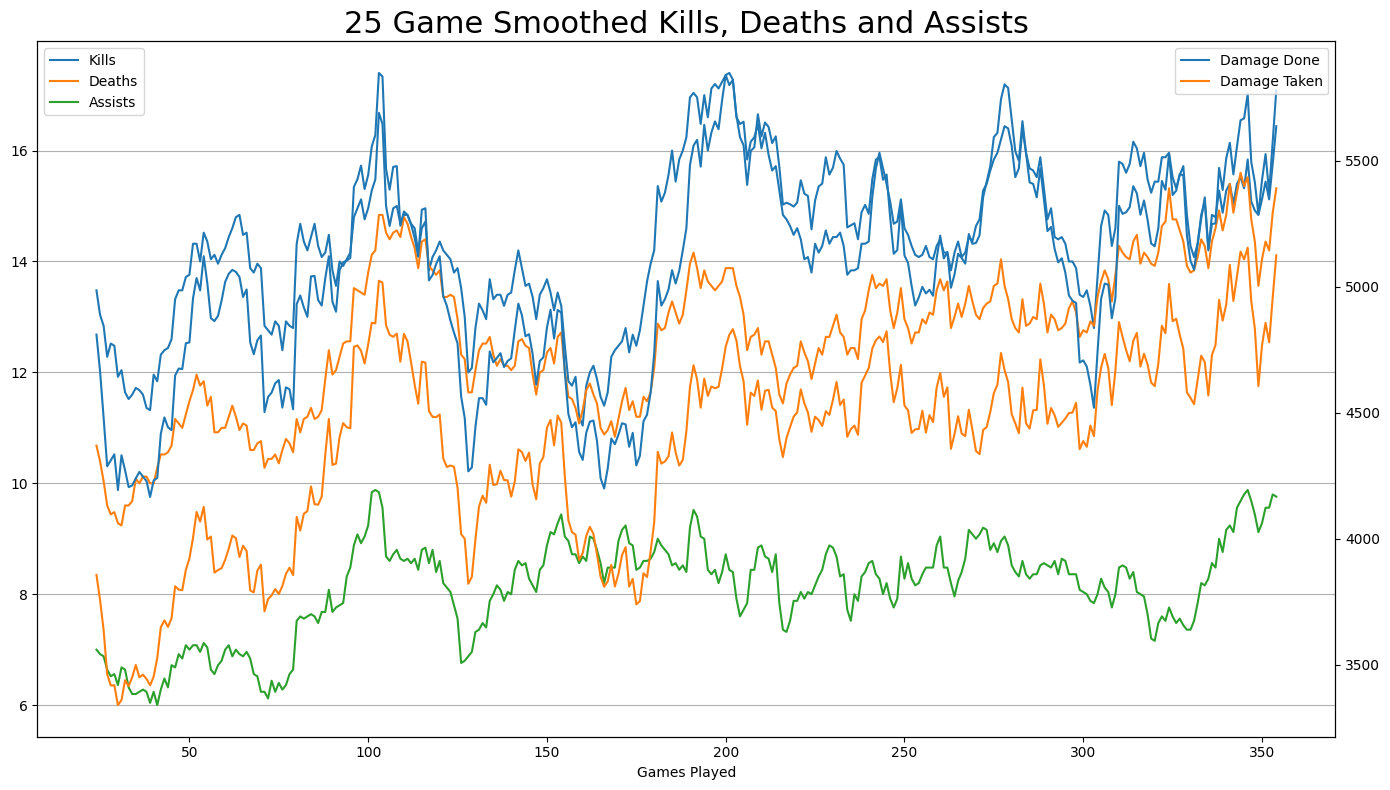

In [11]:
# Smooth the LifetimeWinRate using a 10-game moving average
# Set roll to ** game moving average
roll = 25
dfr['SmoothedKills'] = dfr['Kills'].rolling(window=roll).mean() 
dfr['SmoothedDeaths'] = dfr['Deaths'].rolling(window=roll).mean() 
dfr['SmoothedAssists'] = dfr['Assists'].rolling(window=roll).mean()
dfr['SmoothedDmg'] = dfr['DamageDone'].rolling(window=roll).mean()
dfr['SmoothedDmgT'] = dfr['DamageTaken'].rolling(window=roll).mean()


plt.figure(figsize=(14,8))
ax1 = plt.gca()
ax2 = plt.twinx(ax1)
ax1.plot(dfr['SmoothedKills'], label='Kills' )
ax1.plot(dfr['SmoothedDeaths'], label='Deaths')
ax1.plot(dfr['SmoothedAssists'], label='Assists')
ax2.plot(dfr['SmoothedDmg'], label='Damage Done')
ax2.plot(dfr['SmoothedDmgT'], label='Damage Taken')
ax1.set_title(f'{roll} Game Smoothed Kills, Deaths and Assists', fontsize=22)
ax1.set_xlabel('Games Played')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_facecolor('red')


ax1.yaxis.grid(True)
plt.tight_layout()
plt.savefig('Plots/KDASmooth.png', dpi=300)
plt.show()

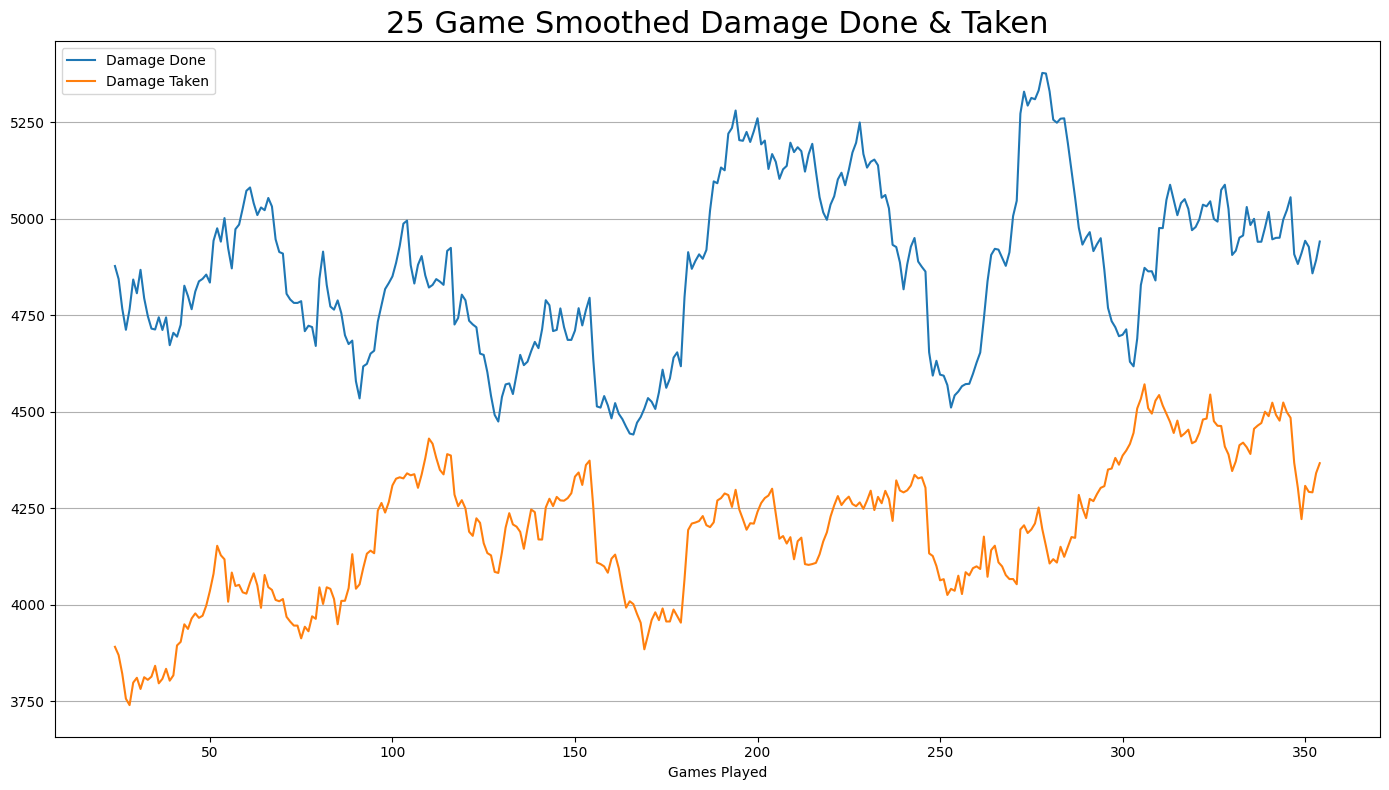

In [12]:
# Smooth the LifetimeWinRate using a 10-game moving average
# Set roll to ** game moving average
roll = 25
dfr['SmoothedDmg'] = dfr['Dmg/10Min'].rolling(window=roll).mean()
dfr['SmoothedDmgT'] = dfr['DmgT/10Min'].rolling(window=roll).mean()


plt.figure(figsize=(14,8))
ax1 = plt.gca()
ax1.plot(dfr['SmoothedDmg'], label='Damage Done')
ax1.plot(dfr['SmoothedDmgT'], label='Damage Taken')
ax1.set_title(f'{roll} Game Smoothed Damage Done & Taken', fontsize=22)
ax1.set_xlabel('Games Played')
ax1.legend(loc='upper left')
ax1.yaxis.grid(True)
plt.tight_layout()
plt.savefig('Plots/KDASmooth.png', dpi=300)
plt.show()

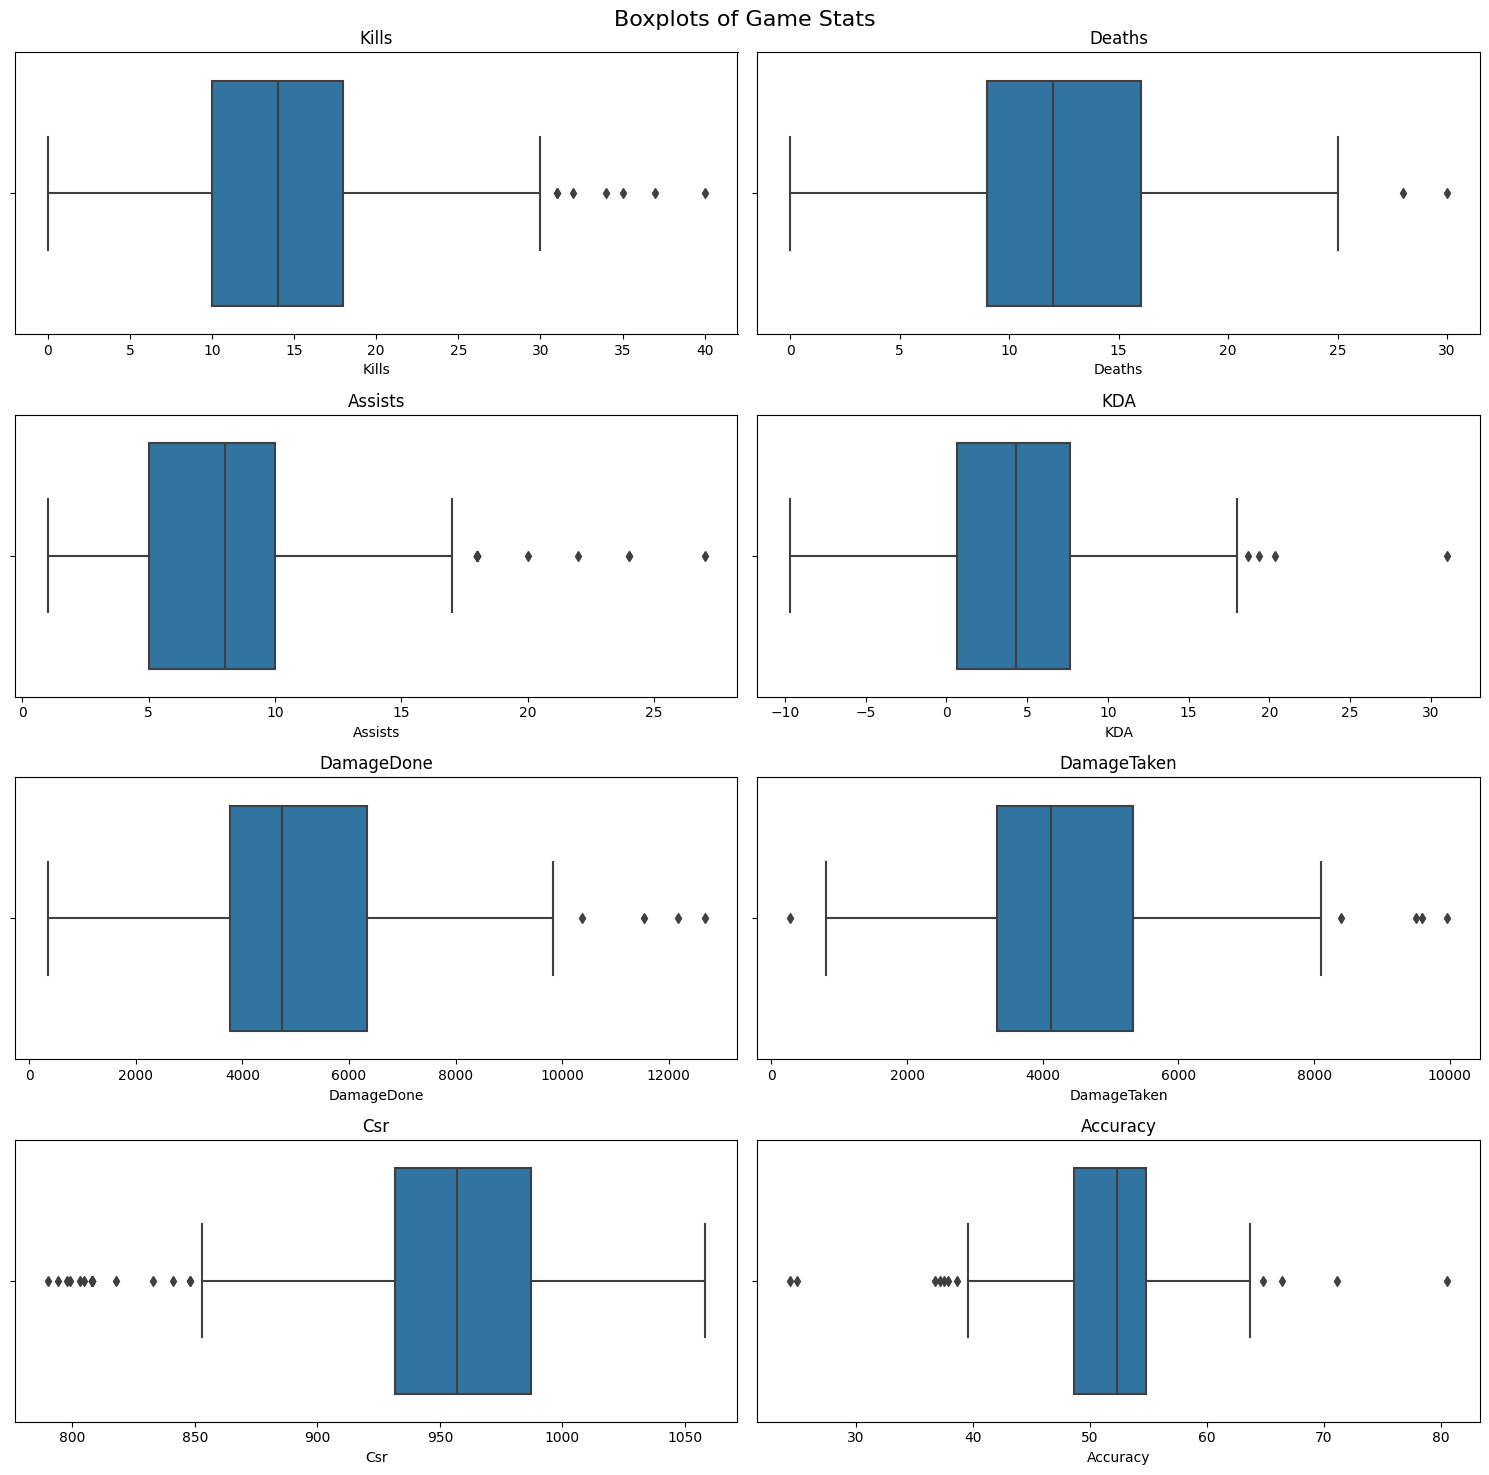

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
columns = ['Kills', 'Deaths', 'Assists', 'KDA', 'DamageDone', 'DamageTaken',
            'Csr', 'Accuracy']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot each column in a separate boxplot
for i, column in enumerate(columns):
    sns.boxplot(x=dfr[column], ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.suptitle('Boxplots of Game Stats', fontsize=16)
plt.tight_layout()
plt.savefig('Plots/Boxplots.png', dpi=300)
plt.show()


In [26]:
mod = 20

# dfmod = dfr.loc[dfr['Deaths'] < mod, 
#                 ['Kills', 'Deaths', 'KD', 'DamageDone', 'DamageTaken', 'DamageRatio', 'Outcome']
#                 ].sort_values('DamageDone', ascending=False)

# Column Choice <>
# dfmod = dfr.loc[dfr['Deaths'] < mod]

# Last * Games
dfmod = dfr.tail(mod)

# print(dfmod.head())
print(f'Overall KD: {round(dfmod["Kills"].sum() / dfmod["Deaths"].sum(),2)}')
print(f"Accuracy: {round(dfmod['ShotsLanded'].sum() / dfmod['ShotsFired'].sum()*100,2)}")
print(f"Damage Ratio: {round(dfmod['DamageDone'].sum() / dfmod['DamageTaken'].sum(),2)}")
print(f"Win-Loss: {(dfmod['Outcome']==1).sum()}-{(dfmod['Outcome']==0).sum()}")
print(f"Max CSR: {dfmod['Csr'].max()}")

Overall KD: 1.07
Accuracy: 53.63
Damage Ratio: 1.11
Win-Loss: 11-9
Max CSR: 1013


In [15]:
dfw = dfr.loc[dfr['Outcome'] == 1, 
                ['Kills', 'Deaths', 'Assists', 'KD', 'DamageDone', 'DamageTaken', 'DamageRatio', 'Outcome', 'ShotsFired', 'ShotsLanded']
                ].sort_values('Kills', ascending=False)

dfl = dfr.loc[dfr['Outcome'] == 0, 
                ['Kills', 'Deaths', 'Assists', 'KD', 'DamageDone', 'DamageTaken', 'DamageRatio', 'Outcome', 'ShotsFired', 'ShotsLanded']
                ].sort_values('Kills', ascending=False)

print('Overall')
print(f'Overall KD: {round(dfr["Kills"].sum() / dfr["Deaths"].sum(),2)}')
print(f"Average Kills: {round(dfr['Kills'].mean(),2)}")
print(f"Average Deaths: {round(dfr['Deaths'].mean(),2)}")
print(f"Average Assists: {round(dfr['Assists'].mean(),2)}")
print(f"Average Accuracy: {round(dfr['ShotsLanded'].sum() / dfr['ShotsFired'].sum() *100,2)}")
print(f"Average Damage Done: {round(dfr['DamageDone'].mean(),)}")
print(f"Average Damage Taken: {round(dfr['DamageTaken'].mean(),)}")
print(f"Damage Ratio: {round(dfr['DamageDone'].sum() / dfr['DamageTaken'].sum(),2)}")
print(f"Win-Loss: {(dfr['Outcome']==1).sum()}-{(dfr['Outcome']==0).sum()}")
print('----------------------------')
print('Wins')
print(f'Overall KD: {round(dfw["Kills"].sum() / dfw["Deaths"].sum(),2)}')
print(f"Average Kills: {round(dfw['Kills'].mean(),2)}")
print(f"Average Deaths: {round(dfw['Deaths'].mean(),2)}")
print(f"Average Assists: {round(dfw['Assists'].mean(),2)}")
print(f"Average Accuracy: {round(dfw['ShotsLanded'].sum() / dfw['ShotsFired'].sum() *100,2)}")
print(f"Average Damage Done: {round(dfw['DamageDone'].mean(),)}")
print(f"Average Damage Taken: {round(dfw['DamageTaken'].mean(),)}")
print(f"Damage Ratio: {round(dfw['DamageDone'].sum() / dfw['DamageTaken'].sum(),2)}")
print(f"Wins: {(dfw['Outcome']==1).sum()}")
print('----------------------------')
print('Losses')
print(f'Overall KD: {round(dfl["Kills"].sum() / dfl["Deaths"].sum(),2)}')
print(f"Average Kills: {round(dfl['Kills'].mean(),2)}")
print(f"Average Deaths: {round(dfl['Deaths'].mean(),2)}")
print(f"Average Assists: {round(dfl['Assists'].mean(),2)}")
print(f"Average Accuracy: {round(dfl['ShotsLanded'].sum() / dfl['ShotsFired'].sum() *100,2)}")
print(f"Average Damage Done: {round(dfl['DamageDone'].mean(),)}")
print(f"Average Damage Taken: {round(dfl['DamageTaken'].mean(),)}")
print(f"Damage Ratio: {round(dfl['DamageDone'].sum() / dfl['DamageTaken'].sum(),2)}")
print(f"Losses: {(dfl['Outcome']==0).sum()}")

Overall
Overall KD: 1.14
Average Kills: 14.43
Average Deaths: 12.69
Average Assists: 8.12
Average Accuracy: 51.87
Average Damage Done: 5085
Average Damage Taken: 4379
Damage Ratio: 1.16
Win-Loss: 190-165
----------------------------
Wins
Overall KD: 1.27
Average Kills: 14.0
Average Deaths: 11.04
Average Assists: 8.29
Average Accuracy: 52.18
Average Damage Done: 4860
Average Damage Taken: 3998
Damage Ratio: 1.22
Wins: 190
----------------------------
Losses
Overall KD: 1.02
Average Kills: 14.92
Average Deaths: 14.6
Average Assists: 7.92
Average Accuracy: 51.53
Average Damage Done: 5344
Average Damage Taken: 4818
Damage Ratio: 1.11
Losses: 165


In [16]:
mapCatKD = dfr.pivot_table(index=['Category', 'Map'], 
                        values=['Kills', 'Deaths', 'Assists', 'Accuracy', 'DamageRatio', 'Outcome'], 
                        aggfunc='mean')

avg_k = dfr['Kills'].mean()
avg_d = dfr['Deaths'].mean()
avg_a = dfr['Assists'].mean()
avg_kd= round(dfr['Kills'].sum() / dfr['Deaths'].sum(),2)

mapCatKD['ExKills'] = mapCatKD['Kills'] - avg_k
mapCatKD['ExDeaths'] = mapCatKD['Deaths'] - avg_d
mapCatKD['ExAssists'] = mapCatKD['Assists'] - avg_a

mapCatKD['KD'] = mapCatKD['Kills'] / mapCatKD['Deaths']
mapCatKD['ExKD'] = mapCatKD['KD'] - avg_kd

desired_col_order = ['Kills','ExKills', 'Deaths', 'ExDeaths', 'Assists', 'ExAssists', 'KD', 'ExKD', 'Accuracy', 'DamageRatio', 'Outcome']

# Reindex the pivot table with the desired column order
mapCatKD = mapCatKD.reindex(desired_col_order, axis=1)
mapCatKD = mapCatKD.round(2)

mapCatKD.sort_values('ExKD', ascending=False)

Kills  ExKills  Deaths  ExDeaths  Assists  \
Category         Map                                                    
King of the Hill Solitude   21.11     6.69   13.78      1.08     9.33   
CTF 3 Captures   Forbidden  14.58     0.16    9.75     -2.94     5.50   
CTF 5 Captures   Aquarius   20.64     6.22   15.36      2.66     8.86   
Extraction       Recharge   12.94    -1.49   10.31     -2.38     8.25   
                 Streets    13.14    -1.28   10.57     -2.12     7.50   
Strongholds      Solitude   20.16     5.73   16.44      3.75    10.52   
Extraction       Live Fire  13.14    -1.28   11.21     -1.48     6.71   
Strongholds      Live Fire  16.07     1.64   13.73      1.04     6.53   
Slayer           Aquarius   11.06    -3.36    9.87     -2.82     6.55   
Oddball          Streets    17.48     3.05   15.78      3.09    11.04   
King of the Hill Recharge   18.65     4.22   16.80      4.11    12.20   
Slayer           Streets     9.18    -5.24    8.36     -4.33     7.09   
CTF 3 Captures   Argyle     13.50    -0.93   12.29     -0.41     6.50   
Oddball          Recharge   14.85     0.42   13.46      0.77     9.23   
Slayer           Live Fire  10.07    -4.35    9.93     -2.76     5.36   
Strongholds      Recharge   14.73     0.31   14.60      1.91     8.93   
Oddball          Live Fire  15.00     0.57   14.88      2.18    10.31   
Slayer           Recharge    9.14    -5.28    9.14     -3.55     7.29   
CTF 3 Captures   Empyrean   13.47    -0.95   13.59      0.90     8.06   
King of the Hill Live Fire  12.86    -1.57   13.07      0.38     5.93   
Slayer           Solitude   10.63    -3.80   11.00     -1.69     6.48   

                            ExAssists    KD  ExKD  Accuracy  DamageRatio  \
Category         Map                                                       
King of the Hill Solitude        1.22  1.53  0.39     52.28         1.33   
CTF 3 Captures   Forbidden      -2.62  1.50  0.36     54.89         1.51   
CTF 5 Captures   Aquarius        0.74  1.34  0.20     51.88         1.32   
Extraction       Recharge        0.13  1.25  0.11     52.30         1.31   
                 Streets        -0.62  1.24  0.10     54.60         1.23   
Strongholds      Solitude        2.40  1.23  0.09     52.70         1.20   
Extraction       Live Fire      -1.40  1.17  0.03     55.67         1.21   
Strongholds      Live Fire      -1.58  1.17  0.03     52.19         1.13   
Slayer           Aquarius       -1.57  1.12 -0.02     51.40         1.18   
Oddball          Streets         2.93  1.11 -0.03     54.27         1.20   
King of the Hill Recharge        4.08  1.11 -0.03     50.29         1.13   
Slayer           Streets        -1.02  1.10 -0.04     49.33         1.16   
CTF 3 Captures   Argyle         -1.62  1.10 -0.04     49.27         1.19   
Oddball          Recharge        1.12  1.10 -0.04     49.97         1.13   
Slayer           Live Fire      -2.76  1.01 -0.13     48.48         1.06   
Strongholds      Recharge        0.82  1.01 -0.13     50.00         1.16   
Oddball          Live Fire       2.20  1.01 -0.13     51.65         1.21   
Slayer           Recharge       -0.83  1.00 -0.14     48.53         1.09   
CTF 3 Captures   Empyrean       -0.06  0.99 -0.15     50.42         1.13   
King of the Hill Live Fire      -2.19  0.98 -0.16     56.44         1.05   
Slayer           Solitude       -1.63  0.97 -0.17     50.20         1.10   

                            Outcome  
Category         Map                 
King of the Hill Solitude      0.56  
CTF 3 Captures   Forbidden     0.67  
CTF 5 Captures   Aquarius      0.29  
Extraction       Recharge      0.62  
                 Streets       0.61  
Strongholds      Solitude      0.36  
Extraction       Live Fire     0.43  
Strongholds      Live Fire     0.60  
Slayer           Aquarius      0.65  
Oddball          Streets       0.57  
King of the Hill Recharge      0.60  
Slayer           Streets       0.73  
CTF 3 Captures   Argyle        0.50  
Oddball          Recharge    

In [17]:
mapKD = dfr.pivot_table(index='Map', 
                        values=['Kills', 'Deaths', 'Assists', 'Accuracy', 'KD', 'DamageRatio', 'Outcome'], 
                        aggfunc='mean')

desired_col_order = ['Kills', 'Deaths', 'KD', 'Assists', 'Accuracy', 'DamageRatio', 'Outcome']

# Reindex the pivot table with the desired column order
mapKD = mapKD.reindex(desired_col_order, axis=1)
mapKD = mapKD.round(2)

mapKD

,Kills,Deaths,KD,Assists,Accuracy,DamageRatio,Outcome
Map,,,,,,,
Aquarius,14.04,11.58,1.31,7.27,51.55,1.22,0.53
Argyle,13.50,12.29,1.15,6.50,49.27,1.19,0.50
Empyrean,13.47,13.59,1.09,8.06,50.42,1.13,0.41
Forbidden,14.58,9.75,1.84,5.50,54.89,1.51,0.67
Live Fire,13.51,12.64,1.22,7.05,52.84,1.14,0.55
Recharge,14.90,13.51,1.27,9.59,50.45,1.17,0.54
Solitude,16.08,13.64,1.24,8.56,51.53,1.18,0.46
Streets,14.05,12.11,1.22,8.74,53.54,1.21,0.61


In [18]:
catKD = dfr.pivot_table(index='Category', 
                        values=['Kills', 'Deaths', 'Accuracy', 'KD', 'DamageRatio', 'Outcome', 'Assists'], 
                        aggfunc='mean')

desired_col_order = ['Kills', 'Deaths', 'Assists', 'KD', 'Accuracy', 'DamageRatio', 'Outcome']

# Reindex the pivot table with the desired column order
catKD = catKD.reindex(desired_col_order, axis=1)
catKD = catKD.round(2)

catKD

,Kills,Deaths,Assists,KD,Accuracy,DamageRatio,Outcome
Category,,,,,,,
CTF 3 Captures,13.79,12.09,6.84,1.32,51.29,1.26,0.51
CTF 5 Captures,20.64,15.36,8.86,1.50,51.88,1.32,0.29
Extraction,13.09,10.66,7.52,1.38,54.22,1.25,0.57
King of the Hill,17.28,14.95,9.56,1.24,52.71,1.15,0.63
Oddball,16.06,14.92,10.37,1.20,52.39,1.19,0.52
Slayer,10.40,9.98,6.47,1.19,50.11,1.13,0.59
Strongholds,17.56,15.20,9.00,1.20,51.83,1.17,0.44


In [19]:
dfrc = dfr.groupby('Category').agg({'LengthMinutes': 'sum', 'Category': 'count'})
dfrc.rename(columns={'Category': 'Count'}, inplace=True)
dfrc['LengthHours'] = round(dfrc['LengthMinutes'] / 60,2)
dfrc['LengthMinutes'] = round(dfrc['LengthMinutes'],2)
dfrc['Length%'] = round(dfrc['LengthMinutes'] / dfrc['LengthMinutes'].sum() * 100,2)
dfrc['Count%'] = round(dfrc['Count'] / dfrc['Count'].sum() * 100,2)
dfrc['TimeMultiple'] = dfrc['Length%'] - dfrc['Count%']
dfrc.sort_values('Length%', ascending=False)

,LengthMinutes,Count,LengthHours,Length%,Count%,TimeMultiple
Category,,,,,,
Slayer,773.83,90,12.90,21.17,25.35,-4.18
Strongholds,648.13,55,10.80,17.73,15.49,2.24
Oddball,610.55,52,10.18,16.70,14.65,2.05
Extraction,506.23,58,8.44,13.85,16.34,-2.49
King of the Hill,466.68,43,7.78,12.77,12.11,0.66
CTF 3 Captures,465.50,43,7.76,12.73,12.11,0.62
CTF 5 Captures,184.40,14,3.07,5.04,3.94,1.10


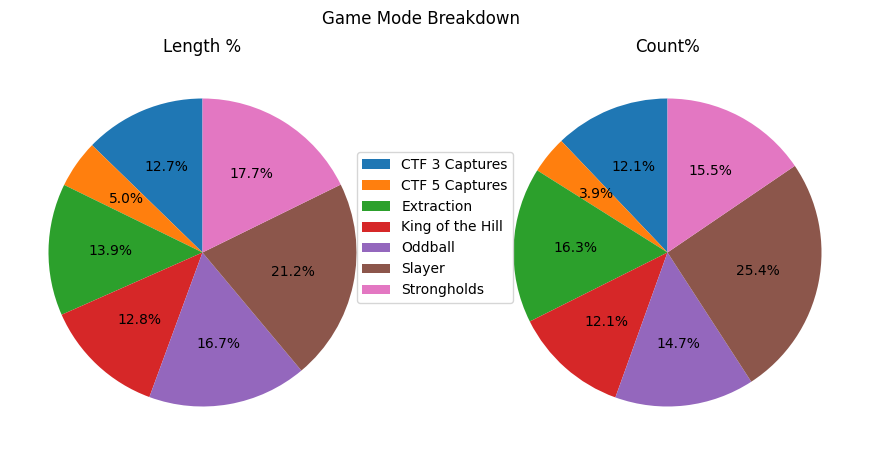

In [20]:
import matplotlib.pyplot as plt

labels = dfrc.index.get_level_values('Category').tolist()
sizes_length = dfrc['Length%'].tolist()
sizes_count = dfrc['Count%'].tolist()

fig, ax = plt.subplots(1, 2, figsize=(11, 5))  # Create a subplot with 1 row and 2 columns
ax[0].pie(sizes_length, labels=None, autopct='%1.1f%%', startangle=90)
ax[1].pie(sizes_count, labels=None, autopct='%1.1f%%', startangle=90)
fig.suptitle('Game Mode Breakdown')
ax[0].set(aspect="equal", title='Length %')
ax[1].set(aspect="equal", title='Count%')
fig.legend(labels, loc="center")

plt.show()

In [21]:
dfrc = dfr.groupby(['Category','Map']).agg({'Category': 'count', 'LengthMinutes': 'sum', 'Outcome': 'mean'})
dfrc.rename(columns={'Category': 'Count', 'LengthMinutes': 'LengthHours'}, inplace=True)
dfrc['LengthHours'] = round(dfrc['LengthHours']/60,2)
dfrc['Outcome'] = round(dfrc['Outcome'],2)
dfrc['Count%'] = round(dfrc['Count'] / dfrc['Count'].sum() * 100,2)
dfrc['Length%'] = round(dfrc['LengthHours'] / dfrc['LengthHours'].sum() * 100,2)
dfrc = dfrc.sort_values(['Length%'], ascending=False)
dfrc

,,Count,LengthHours,Outcome,Count%,Length%
Category,Map,,,,,
Strongholds,Solitude,25,5.26,0.36,7.04,8.63
Oddball,Streets,23,4.63,0.57,6.48,7.60
Slayer,Aquarius,31,4.44,0.65,8.73,7.29
King of the Hill,Recharge,20,4.05,0.60,5.63,6.65
Extraction,Streets,28,3.98,0.61,7.89,6.53
Slayer,Solitude,27,3.96,0.52,7.61,6.50
CTF 3 Captures,Empyrean,17,3.09,0.41,4.79,5.07
CTF 5 Captures,Aquarius,14,3.07,0.29,3.94,5.04
Oddball,Live Fire,16,3.01,0.56,4.51,4.94


In [45]:
dfrcc = dfr.groupby(['Category','Map']).agg({'Category': 'count',
                                             'Kills' : 'sum',
                                             'Deaths' : 'sum',
                                             'Assists' : 'sum',
                                             'DamageDone': 'sum',
                                             'DamageTaken': 'sum',
                                             'Outcome': 'mean',
                                             'LengthMinutes': 'sum',
                                             })
dfrcc.rename(columns={'Category': 'Count', 'Outcome': 'Winrate'}, inplace=True)
dfrcc['KD'] = dfrcc['Kills'] / dfrcc['Deaths']
dfrcc['DamageRatio'] = dfrcc['DamageDone'] / dfrcc['DamageTaken']
dfrcc['Dmg/Life'] = dfrcc['DamageDone'] / dfrcc['Deaths']
dfrcc['ExDmg/Life'] = (dfrcc['DamageDone'] - dfrcc['DamageTaken']) / dfrcc['Deaths']
dfrcc['Kills/10Min'] = dfrcc['Kills'] / dfrcc['LengthMinutes'] * 10
dfrcc['Deaths/10Min'] = dfrcc['Deaths'] / dfrcc['LengthMinutes'] * 10
dfrcc['Assists/10Min'] = dfrcc['Assists'] / dfrcc['LengthMinutes'] * 10
dfrcc['KDA/10Min'] = (dfrcc['Kills/10Min'] + (dfrcc['Assists/10Min'] / 3)) / dfrcc['Deaths/10Min'] 
dfrcc = round(dfrcc.sort_values(['KDA/10Min', 'Winrate'], ascending=False),2)
dfrcc

Count  Kills  Deaths  Assists  DamageDone  \
Category         Map                                                    
King of the Hill Solitude       9    190     124       84       56888   
CTF 3 Captures   Forbidden     12    175     117       66       59534   
CTF 5 Captures   Aquarius      14    289     215      124       95851   
Extraction       Recharge      16    207     165      132       71477   
                 Streets       28    368     296      210      121784   
Strongholds      Solitude      25    504     411      263      164759   
Slayer           Streets       11    101      92       78       38989   
Extraction       Live Fire     14    184     157       94       63194   
King of the Hill Recharge      20    373     336      244      128767   
Slayer           Aquarius      31    343     306      203      130563   
Oddball          Streets       23    402     363      254      142794   
                 Recharge      13    193     175      120       72171   
Strongholds      Live Fire     15    241     206       98       82304   
CTF 3 Captures   Argyle        14    189     172       91       68720   
Slayer           Recharge       7     64      64       51       27933   
Oddball          Live Fire     16    240     238      165       90905   
Strongholds      Recharge      15    221     219      134       81496   
Slayer           Live Fire     14    141     139       75       52742   
CTF 3 Captures   Empyrean      17    229     231      137       83856   
Slayer           Solitude      27    287     297      175      111635   
King of the Hill Live Fire     14    180     183       83       58922   

                            DamageTaken  Winrate  LengthMinutes    KD  \
Category         Map                                                    
King of the Hill Solitude         43261     0.56         102.78  1.53   
CTF 3 Captures   Forbidden        44410     0.67         120.88  1.50   
CTF 5 Captures   Aquarius         74577     0.29         184.40  1.34   
Extraction       Recharge         58096     0.62         146.92  1.25   
                 Streets         100368     0.61         238.93  1.24   
Strongholds      Solitude        137883     0.36         315.38  1.23   
Slayer           Streets          33107     0.73          84.13  1.10   
Extraction       Live Fire        53218     0.43         120.38  1.17   
King of the Hill Recharge        113258     0.60         242.80  1.11   
Slayer           Aquarius        112692     0.65         266.60  1.12   
Oddball          Streets         122705     0.57         277.75  1.11   
                 Recharge         64740     0.38         152.28  1.10   
Strongholds      Live Fire        73589     0.60         168.80  1.17   
CTF 3 Captures   Argyle           60551     0.50         159.38  1.10   
Slayer           Recharge         25951     0.71          63.57  1.00   
Oddball          Live Fire        76808     0.56         180.52  1.01   
Strongholds      Recharge         71535     0.40         163.95  1.01   
Slayer           Live Fire        50712     0.43         122.20  1.01   
CTF 3 Captures   Empyrean         76999     0.41         185.23  0.99   
Slayer           Solitude        102627     0.52         237.33  0.97   
King of the Hill Live Fire        57613     0.71         121.10  0.98   

                            DamageRatio  Dmg/Life  ExDmg/Life  Kills/10Min  \
Category         Map                                                         
King of the Hill Solitude          1.31    458.77      109.90        18.49   
CTF 3 Captures   Forbidden         1.34    508.84      129.26        14.48   
CTF 5 Captures   Aquarius          1.29    445.82       98.95        15.67   
Extraction       Recharge          1.23    433.19       81.10        14.09   
                 Streets           1.21    411.43       72.35        15.40   
Strongholds      Solitude          1.19    400.87       65.39        15.98   
Slayer           Streets           1.18    4

In [23]:
dfrcc = dfr.groupby('Category').agg({'Category': 'count',
                                             'Kills' : 'sum',
                                             'Deaths' : 'sum',
                                             'Assists' : 'sum',
                                             'DamageDone': 'sum',
                                             'DamageTaken': 'sum',
                                             'Outcome': 'mean',
                                             })
dfrcc.rename(columns={'Category': 'Count', 'Outcome': 'Winrate'}, inplace=True)
dfrcc['KD'] = dfrcc['Kills'] / dfrcc['Deaths']
dfrcc['DamageRatio'] = dfrcc['DamageDone'] / dfrcc['DamageTaken']
dfrcc['Dmg/Life'] = dfrcc['DamageDone'] / dfrcc['Deaths']
dfrcc['ExDmg/Life'] = (dfrcc['DamageDone'] - dfrcc['DamageTaken']) / dfrcc['Deaths']
dfrcc = round(dfrcc.sort_values('Winrate', ascending=False),2)
dfrcc

,Count,Kills,Deaths,Assists,DamageDone,DamageTaken,Winrate,KD,DamageRatio,Dmg/Life,ExDmg/Life
Category,,,,,,,,,,,
King of the Hill,43,743,643,411,244577,214132,0.63,1.16,1.14,380.37,47.35
Slayer,90,936,898,582,361862,325089,0.59,1.04,1.11,402.96,40.95
Extraction,58,759,618,436,256455,211682,0.57,1.23,1.21,414.98,72.45
Oddball,52,835,776,539,305870,264253,0.52,1.08,1.16,394.16,53.63
CTF 3 Captures,43,593,520,294,212110,181960,0.51,1.14,1.17,407.90,57.98
Strongholds,55,966,836,495,328559,283007,0.44,1.16,1.16,393.01,54.49
CTF 5 Captures,14,289,215,124,95851,74577,0.29,1.34,1.29,445.82,98.95


In [24]:
dfrcc = dfr.groupby('Map').agg({'Category': 'count',
                                             'Kills' : 'sum',
                                             'Deaths' : 'sum',
                                             'Assists' : 'sum',
                                             'DamageDone': 'sum',
                                             'DamageTaken': 'sum',
                                             'Outcome': 'mean',
                                             })
dfrcc.rename(columns={'Category': 'Count', 'Outcome': 'Winrate'}, inplace=True)
dfrcc['KD'] = dfrcc['Kills'] / dfrcc['Deaths']
dfrcc['DamageRatio'] = dfrcc['DamageDone'] / dfrcc['DamageTaken']
dfrcc['Dmg/Life'] = dfrcc['DamageDone'] / dfrcc['Deaths']
dfrcc['ExDmg/Life'] = (dfrcc['DamageDone'] - dfrcc['DamageTaken']) / dfrcc['Deaths']
dfrcc = round(dfrcc.sort_values('ExDmg/Life', ascending=False),2)
dfrcc

,Count,Kills,Deaths,Assists,DamageDone,DamageTaken,Winrate,KD,DamageRatio,Dmg/Life,ExDmg/Life
Map,,,,,,,,,,,
Forbidden,12,175,117,66,59534,44410,0.67,1.50,1.34,508.84,129.26
Aquarius,45,632,521,327,226414,187269,0.53,1.21,1.21,434.58,75.13
Streets,62,871,751,542,303567,256180,0.61,1.16,1.18,404.22,63.10
Solitude,61,981,832,522,333282,283771,0.46,1.18,1.17,400.58,59.51
Recharge,71,1058,959,681,381844,333580,0.54,1.10,1.14,398.17,50.33
Argyle,14,189,172,91,68720,60551,0.50,1.10,1.13,399.53,47.49
Live Fire,73,986,923,515,348067,311940,0.55,1.07,1.12,377.10,39.14
Empyrean,17,229,231,137,83856,76999,0.41,0.99,1.09,363.01,29.68


In [25]:
print(f'Runtime: {time.perf_counter() - start}s')

Runtime: 6.081084499994176s
